<a href="https://colab.research.google.com/github/Roopesh-DMahanthi/lymphoma-cell-detection/blob/master/Lymphoma_Cell_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Non Hodgkins Lymphoma Cell Detection & Curable/Fatal State Predictor by Gene Expression Profiling using Supervised-Learning

Importing Required Dependencies
Numpy, Pandas, Matplotlib


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing Dataset from the Below Github Link concerned with this Project

In [0]:
df = pd.read_csv('https://github.com/Roopesh-DMahanthi/lymphoma-cell-detection/raw/master/Lymphoma-Dataset.csv') 

Checking whether Dataset Contains any **NULL** Values

In [47]:
print((df.isna()==True).sum())

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V7127    0
V7128    0
V7129    0
TYPE     0
DTH      0
Length: 7131, dtype: int64


Splitting of Features and Labels as per Required
X contains all the Features
y1 contains Types of Cells Details
y2 contains whether the patient's conditon is Curable or Fatal

In [48]:
X = df.iloc[:,:-2].values
y1 = df.iloc[:,-2].values
y2 = df.iloc[:,-1].values
print("X - Shape {}".format(X.shape))
print("y1 - Shape {}".format(y1.shape))
print("y2 - Shape {}".format(y2.shape))

X - Shape (77, 7129)
y1 - Shape (77,)
y2 - Shape (77,)


#Data Preprocessing

Importing required Data Preprocessing Libraries

In [0]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.decomposition import PCA

Applying LabelEncoder over y1 and y2 to convert categorical values to Integer Values

In [0]:
le_c = LabelEncoder()
le_c.fit(y1)
y_map1 = {i : l for i, l in enumerate(le_c.classes_)}
y1 = le_c.transform(y1)
le_d = LabelEncoder()
le_d.fit(y2)
y_map2 = {i : l for i, l in enumerate(le_d.classes_)}
y2 = le_d.transform(y2)

Displaying the Mappings Done on y1 and y2

In [51]:
y_map1,y_map2

({0: 'DLBCL', 1: 'FL'}, {0: 'CURED', 1: 'FATAL'})

Splitting up of Data for Training and Testing the Models

In [0]:
X_trn,X_tst,y_trn1,y_tst1 = tts(X,y1,test_size=0.3,random_state=0,stratify=y1)
X_trn2,X_tst2,y_trn2,y_tst2 = tts(X,y2,test_size=0.3,random_state=0,stratify=y2)

Apllying Principal Component Analysis on both Training and Testing Features Data

In [0]:
pca1 = PCA(n_components= 15)
X_trn = pca1.fit_transform(X_trn)
X_tst = pca1.fit_transform(X_tst)
pca2 = PCA(n_components= 15)
X_trn2 = pca2.fit_transform(X_trn2)
X_tst2 = pca2.fit_transform(X_tst2)

Applying StandardScaler to Standardize values

In [0]:
sc1=StandardScaler()
X_trn=sc1.fit_transform(X_trn)
X_tst=sc1.fit_transform(X_tst)
sc2=StandardScaler()
X_trn2=sc2.fit_transform(X_trn2)
X_tst2=sc2.fit_transform(X_tst2)

# Importing Required Supervised-Learning Models

In [0]:
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DecTreeC
from sklearn.ensemble import RandomForestClassifier as RndFC
from sklearn.neighbors import KNeighborsClassifier as KnnC
from sklearn.metrics import classification_report as report ,confusion_matrix as cmatrix, accuracy_score

Declaring required Globals Data for Further Purposes

In [0]:
models = ['LogisticRegression','SVC','DecisionTreeClassifier','RandomForestClassifier','KNeighborsClassifier']
accu_types = ['Training Data Accuracy','Testing Data Accuracy']
dict1={}
dict2={}

# Applying Different Models to Predict Cell Type from Gene Data

*Using Logistic Regression to Classify Type of Cell Data*

In [0]:
obj = LogReg(penalty='l2',class_weight='balanced',max_iter=200)
obj.fit(X_trn,y_trn1)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn1)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst1)
dict1.update( {models[0] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

*Using Support Vector Classifier to Classify Type of Cell Data*

In [0]:
obj = SVC(kernel='rbf',degree=3,gamma='auto')
obj.fit(X_trn,y_trn1)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn1)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst1)
dict1.update( {models[1] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

*Using Decision Tree Classifier to Classify Type of Cell Data*

In [0]:
obj = DecTreeC(criterion='gini',splitter='best',max_depth=10,min_samples_leaf=1)
obj.fit(X_trn,y_trn1)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn1)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst1)
dict1.update( {models[2] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

*Using Random Forest Classifier to Classify Type of Cell Data*

In [0]:
obj = RndFC(n_estimators=50,criterion='gini',random_state=0)
obj.fit(X_trn,y_trn1)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn1)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst1)
dict1.update( {models[3] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

Using K-Nearest Neighbours Classifier to Classify Type of Cell Data

In [0]:
obj = KnnC(n_neighbors=10,weights='distance',metric='minkowski')
obj.fit(X_trn,y_trn1)
accu_trn = accuracy_score(obj.predict(X_trn) ,y_trn1)
accu_tst = accuracy_score(obj.predict(X_tst) ,y_tst1)
dict1.update( {models[4] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

Displaying Respective Accuracy's Obtained from Above Models

In [62]:
print("\t\tCELL DETECTION\n")
trn_accs1=[]
tst_accs1=[]
for k,v in dict1.items():
  print(k)
  for k2,v2 in v.items():
    print("\t %s - %f"%(k2,v2))
    if(k2==accu_types[0]):
      trn_accs1.append(v2)
    else:
      tst_accs1.append(v2)
  print()

		CELL DETECTION

LogisticRegression
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.500000

SVC
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.666667

DecisionTreeClassifier
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.666667

RandomForestClassifier
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.666667

KNeighborsClassifier
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.625000



# Applying Different Models to Predict Patient Status (Curable/Fatal) from Gene Data

*Using Logistic Regression to Classify Patient Status*

In [0]:
obj = LogReg(penalty='l2',class_weight='balanced',max_iter=500)
obj.fit(X_trn2,y_trn2)
accu_trn = accuracy_score(obj.predict(X_trn2) ,y_trn2)
accu_tst = accuracy_score(obj.predict(X_tst2) ,y_tst2)
dict2.update( {models[0] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

*Using Support Vector Classifier to Classify Patient Status*

In [0]:
obj = SVC(kernel='rbf',degree=3)
obj.fit(X_trn2,y_trn2)
accu_trn = accuracy_score(obj.predict(X_trn2) ,y_trn2)
accu_tst = accuracy_score(obj.predict(X_tst2) ,y_tst2)
dict2.update( {models[1] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

*Using Decision Tree Classifier to Classify Patient Status*

In [0]:
obj = DecTreeC(criterion='gini',splitter='best',max_depth=10,min_samples_leaf=1)
obj.fit(X_trn2,y_trn1)
accu_trn = accuracy_score(obj.predict(X_trn2) ,y_trn1)
accu_tst = accuracy_score(obj.predict(X_tst2) ,y_tst1)
dict2.update( {models[2] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

*Using Random Forest Classifier to Classify Patient Status*

In [0]:
obj = RndFC(n_estimators=50,criterion='gini',random_state=0)
obj.fit(X_trn2,y_trn2)
accu_trn = accuracy_score(obj.predict(X_trn2) ,y_trn2)
accu_tst = accuracy_score(obj.predict(X_tst2) ,y_tst2)
dict2.update( {models[3] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

*Using K-Nearest Neighbours Classifier to Classify Patient Status*

In [0]:
obj = KnnC(n_neighbors=10,weights='distance',metric='minkowski')
obj.fit(X_trn2,y_trn2)
accu_trn = accuracy_score(obj.predict(X_trn2) ,y_trn2)
accu_tst = accuracy_score(obj.predict(X_tst2) ,y_tst2)
dict2.update( {models[4] : { accu_types[0] : accu_trn , accu_types[1] : accu_tst}})

Displaying Respective Accuracy's Obtained from Above Models

In [68]:
print("\t\tCURABLE / FATAL\n")
trn_accs2=[]
tst_accs2=[]
for k,v in dict2.items():
  print(k)
  for k2,v2 in v.items():
    print("\t %s - %f"%(k2,v2))
    if(k2==accu_types[0]):
      trn_accs2.append(v2)
    else:
      tst_accs2.append(v2)
  print()

		CURABLE / FATAL

LogisticRegression
	 Training Data Accuracy - 0.773585
	 Testing Data Accuracy - 0.416667

SVC
	 Training Data Accuracy - 0.924528
	 Testing Data Accuracy - 0.541667

DecisionTreeClassifier
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.541667

RandomForestClassifier
	 Training Data Accuracy - 0.981132
	 Testing Data Accuracy - 0.458333

KNeighborsClassifier
	 Training Data Accuracy - 1.000000
	 Testing Data Accuracy - 0.541667



# Plotting **Bar Graph** in comparision of Accuracy's across Different Models used for Both Cases

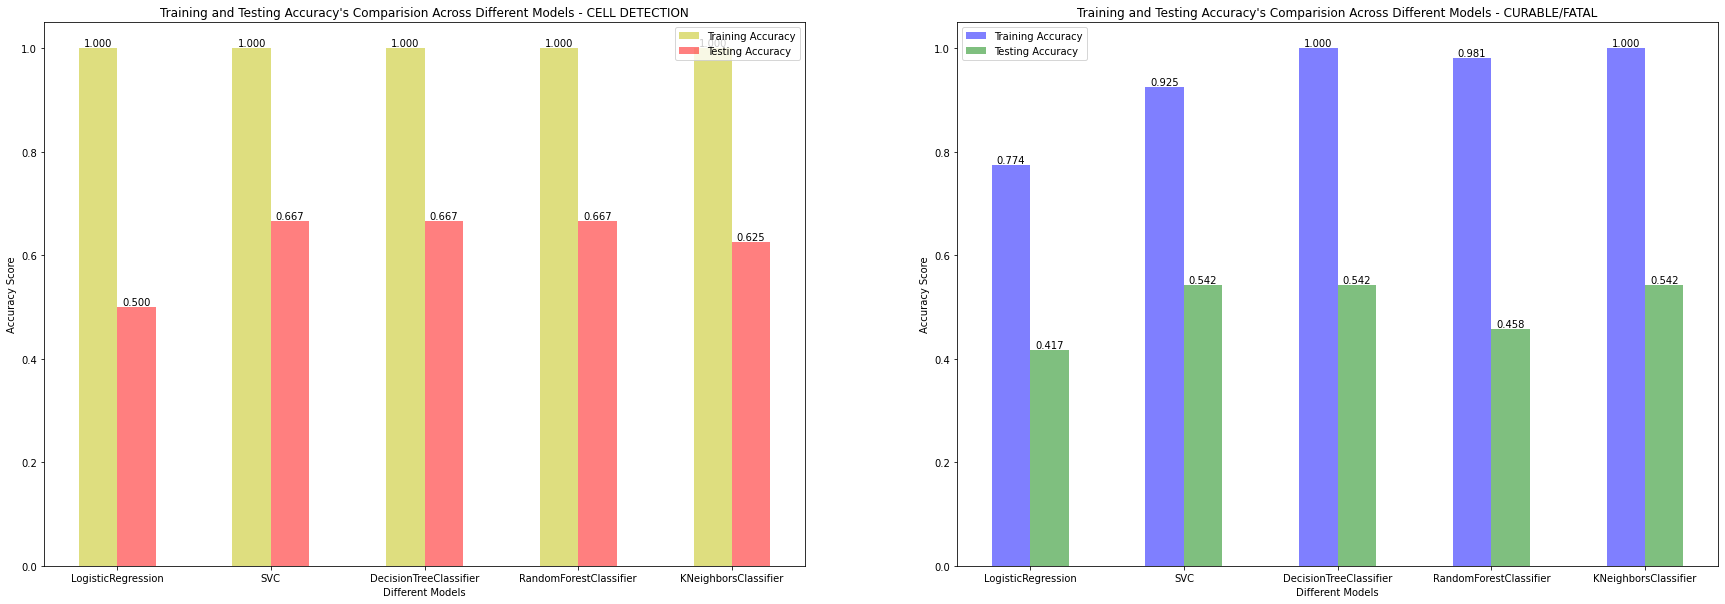

In [69]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., height,'%.3f' %float(round(height,3)),ha='center', va='bottom')
ind = np.arange(len(models))
trn_bar = plt.bar(ind, trn_accs1, 0.25,alpha=0.5,color='y',label='Training Accuracy')
autolabel(trn_bar)
tst_bar = plt.bar(ind + 0.25, tst_accs1, 0.25,alpha=0.5,color='r',label='Testing Accuracy')
autolabel(tst_bar)
plt.xlabel('Different Models')
plt.ylabel('Accuracy Score')
plt.title("Training and Testing Accuracy's Comparision Across Different Models - CELL DETECTION")
plt.xticks(ind + 0.125, models)
plt.legend()
plt.subplot(1,2,2)
#plt.figure(figsize=(20,12))
ind = np.arange(len(models))
trn_bar = plt.bar(ind, trn_accs2, 0.25,alpha=0.5,color='b',label='Training Accuracy')
autolabel(trn_bar)
tst_bar = plt.bar(ind + 0.25, tst_accs2, 0.25,alpha=0.5,color='g',label='Testing Accuracy')
autolabel(tst_bar)
plt.xlabel('Different Models')
plt.ylabel('Accuracy Score')
plt.title("Training and Testing Accuracy's Comparision Across Different Models - CURABLE/FATAL")
plt.xticks(ind + 0.125, models)
plt.legend()
plt.show()